In [ ]:
!git clone https://github.com/sskyisthelimit/DS_Internship2.git
%cd /kaggle/working/DS_Internship2/task1/
!python3 -m pip install -r requirements.txt
!python3 -m pip install -e .

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

In [3]:
from src.classifiers import MnistClassifier
from src.utils import MnistDataset

In [ ]:

device = "cuda" if torch.cuda.is_available() else "cpu"
datapath = "./dataset/"
batch_size = 64
weights_dir = "./weights/"


test_imgs_p = os.path.join(datapath, "t10k-images.idx3-ubyte")
test_labels_p = os.path.join(datapath, "t10k-labels.idx1-ubyte")
    
test_dataset = MnistDataset(test_imgs_p, test_labels_p)

test_loader = DataLoader(test_dataset, batch_size=batch_size,
                            shuffle=False)

cnn_classifier = MnistClassifier("cnn", device=device)
cnn_weights_path = os.path.join(weights_dir, "cnn_weights.pth")
cnn_classifier.model.load(cnn_weights_path)

fcnn_classifier = MnistClassifier("nn", device=device)
fcnn_weights_path = os.path.join(weights_dir, "fcnn_weights.pth")
fcnn_classifier.model.load(fcnn_weights_path)

rf_classifier = MnistClassifier("rf", device=device)
rf_weights_path = os.path.join(weights_dir, "rf_weights.gz")
rf_classifier.model.load(rf_weights_path)

In [6]:
y_pred_test_cnn = cnn_classifier.model.eval(test_loader, save_report=False)
y_pred_test_rf = rf_classifier.model.eval(test_loader, save_report=False)
y_pred_test_fcnn = fcnn_classifier.model.eval(test_loader, save_report=False)

CNN Evaluation: 100%|██████████| 157/157 [00:01<00:00, 134.95batch/s]


CNN classification report
              precision    recall  f1-score   support

           0     0.9909    0.9949    0.9929       980
           1     0.9956    0.9903    0.9929      1135
           2     0.9923    0.9952    0.9937      1032
           3     0.9921    0.9901    0.9911      1010
           4     0.9949    0.9898    0.9923       982
           5     0.9822    0.9877    0.9849       892
           6     0.9916    0.9854    0.9885       958
           7     0.9837    0.9971    0.9903      1028
           8     0.9826    0.9856    0.9841       974
           9     0.9910    0.9812    0.9861      1009

    accuracy                         0.9898     10000
   macro avg     0.9897    0.9897    0.9897     10000
weighted avg     0.9898    0.9898    0.9898     10000



RF Evaluation: 100%|██████████| 157/157 [00:01<00:00, 102.60batch/s]


RF classification report
              precision    recall  f1-score   support

           0     0.9748    0.9888    0.9818       980
           1     0.9903    0.9903    0.9903      1135
           2     0.9588    0.9690    0.9639      1032
           3     0.9548    0.9614    0.9581      1010
           4     0.9775    0.9715    0.9745       982
           5     0.9694    0.9585    0.9639       892
           6     0.9731    0.9823    0.9777       958
           7     0.9707    0.9660    0.9683      1028
           8     0.9615    0.9487    0.9550       974
           9     0.9551    0.9485    0.9518      1009

    accuracy                         0.9688     10000
   macro avg     0.9686    0.9685    0.9685     10000
weighted avg     0.9688    0.9688    0.9688     10000



FCNN Evaluation: 100%|██████████| 157/157 [00:00<00:00, 448.72batch/s]

FCNN classification report
              precision    recall  f1-score   support

           0     0.9729    0.9888    0.9808       980
           1     0.9947    0.9894    0.9920      1135
           2     0.9832    0.9651    0.9741      1032
           3     0.9723    0.9743    0.9733      1010
           4     0.9787    0.9827    0.9807       982
           5     0.9709    0.9742    0.9726       892
           6     0.9724    0.9916    0.9819       958
           7     0.9600    0.9805    0.9702      1028
           8     0.9882    0.9497    0.9686       974
           9     0.9722    0.9693    0.9707      1009

    accuracy                         0.9767     10000
   macro avg     0.9766    0.9766    0.9765     10000
weighted avg     0.9768    0.9767    0.9767     10000



In [7]:
test_labels = test_dataset.labels
test_images = test_dataset.images

incorrect_idx_rf = np.where(test_labels != y_pred_test_rf)[0]
incorrect_idx_fcnn = np.where(test_labels != y_pred_test_fcnn)[0]
incorrect_idx_cnn = np.where(test_labels != y_pred_test_cnn)[0]

Random Forest


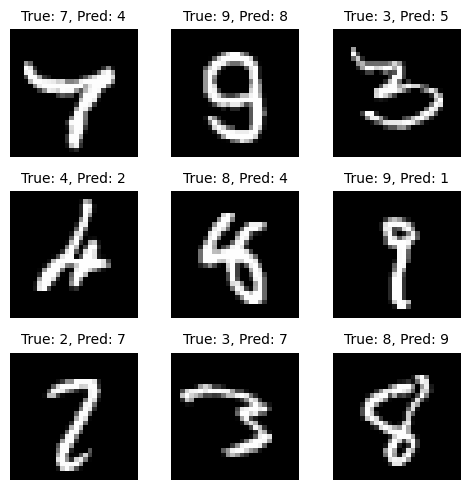

Neural Network


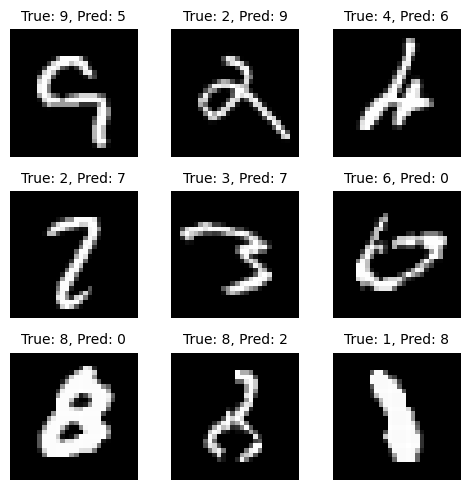

Convolutional Neural Network


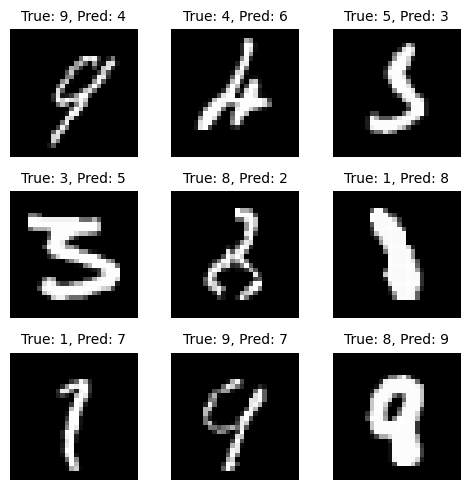

In [8]:
def plot_by_idxs(idxs, y_true, y_pred, test_images, title=''):
    cols, rows = 3, 3
    print(title)
    plt.figure(figsize=(5, 5))
    for i, idx in enumerate(idxs[:cols * rows]):
        plt.subplot(cols, rows, i + 1)
        plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true[idx]}, Pred: {y_pred[idx]}', fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_by_idxs(incorrect_idx_rf, test_labels, y_pred_test_rf, test_images, 'Random Forest')
plot_by_idxs(incorrect_idx_fcnn, test_labels, y_pred_test_fcnn, test_images, 'Neural Network')
plot_by_idxs(incorrect_idx_cnn, test_labels, y_pred_test_cnn, test_images, 'Convolutional Neural Network')
